# Exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('heart_attack_youth_vs_adult.csv', index_col=0)
data

,Age_Group,Gender,Ethnicity,Smoking_Status,Alcohol_Consumption,Diet_Quality,Cholesterol_Level,Blood_Pressure,BMI,Physical_Activity,Stress_Level,Family_History,Diabetes,Air_Quality_Index,Income_Level,Sleep_Hours,Heart_Rate,Medication_Status,Heart_Attack
ID,,,,,,,,,,,,,,,,,,,
1,Youth,Female,Native American,Current Smoker,Moderate,Average,219,130,24.0,149,High,1,0,Moderate,High,4.3,98,0,0
2,Adult,Female,Native American,Non-smoker,Moderate,Average,151,122,35.6,199,Moderate,0,1,Good,Medium,8.0,81,0,0
3,Adult,Male,Native American,Former Smoker,Moderate,Average,141,155,22.3,98,High,0,0,Good,Low,5.9,84,0,1
4,Adult,Female,Black,Non-smoker,Moderate,Average,220,173,29.8,24,High,0,1,Moderate,Low,8.5,75,0,0
5,Youth,Male,White,Non-smoker,Moderate,Average,233,140,30.9,78,High,0,0,Good,Medium,5.9,99,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999996,Adult,Male,Asian,Former Smoker,Moderate,Excellent,181,160,23.5,109,Low,0,0,Good,Medium,4.9,60,0,0
4999997,Youth,Male,Hispanic,Current Smoker,NaN,Poor,205,159,37.6,227,Moderate,0,1,Good,Low,5.7,75,0,0
4999998,Adult,Female,White,Former Smoker,NaN,Average,292,177,24.2,118,Moderate,0,0,Good,Medium,8.9,99,0,1


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5000000 entries, 1 to 5000000
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Age_Group            object 
 1   Gender               object 
 2   Ethnicity            object 
 3   Smoking_Status       object 
 4   Alcohol_Consumption  object 
 5   Diet_Quality         object 
 6   Cholesterol_Level    int64  
 7   Blood_Pressure       int64  
 8   BMI                  float64
 9   Physical_Activity    int64  
 10  Stress_Level         object 
 11  Family_History       int64  
 12  Diabetes             int64  
 13  Air_Quality_Index    object 
 14  Income_Level         object 
 15  Sleep_Hours          float64
 16  Heart_Rate           int64  
 17  Medication_Status    int64  
 18  Heart_Attack         int64  
dtypes: float64(2), int64(8), object(9)
memory usage: 762.9+ MB
None


In [15]:
import pandas as pd

def create_info_table(df):
    # Extract information from the DataFrame
    info_dict = {
        'Column': df.columns,
        'Dtype': df.dtypes
    }
    
    # Create a DataFrame from the extracted information
    info_df = pd.DataFrame(info_dict)
    
    # Reset index for a clean table
    info_df.reset_index(drop=True, inplace=True)
    
    return info_df

# Create and display the info table
info_table = create_info_table(data)
info_table

,Column,Dtype
0,ID,int64
1,Age_Group,object
2,Gender,object
3,Ethnicity,object
4,Smoking_Status,object
5,Alcohol_Consumption,object
6,Diet_Quality,object
7,Cholesterol_Level,int64
8,Blood_Pressure,int64
9,BMI,float64


In [4]:
cols_categorical = data.select_dtypes(include='object').columns
print(len(cols_categorical), cols_categorical)
cols_numeric = data.select_dtypes(include='number').columns
print(len(cols_numeric), cols_numeric)

9 Index(['Age_Group', 'Gender', 'Ethnicity', 'Smoking_Status',
       'Alcohol_Consumption', 'Diet_Quality', 'Stress_Level',
       'Air_Quality_Index', 'Income_Level'],
      dtype='object')
10 Index(['Cholesterol_Level', 'Blood_Pressure', 'BMI', 'Physical_Activity',
       'Family_History', 'Diabetes', 'Sleep_Hours', 'Heart_Rate',
       'Medication_Status', 'Heart_Attack'],
      dtype='object')


In [5]:
# Set display options for better readability
pd.options.display.float_format = '{:,.2f}'.format
data.describe()

,Cholesterol_Level,Blood_Pressure,BMI,Physical_Activity,Family_History,Diabetes,Sleep_Hours,Heart_Rate,Medication_Status,Heart_Attack
count,"5,000,000.00","5,000,000.00","5,000,000.00","5,000,000.00","5,000,000.00","5,000,000.00","5,000,000.00","5,000,000.00","5,000,000.00","5,000,000.00"
mean,209.47,134.51,29.00,149.56,0.30,0.20,7.00,74.51,0.15,0.10
std,51.95,25.98,6.35,86.59,0.46,0.40,1.73,14.43,0.36,0.30
min,120.00,90.00,18.00,0.00,0.00,0.00,4.00,50.00,0.00,0.00
25%,164.00,112.00,23.50,75.00,0.00,0.00,5.50,62.00,0.00,0.00
50%,209.00,135.00,29.00,150.00,0.00,0.00,7.00,75.00,0.00,0.00
75%,254.00,157.00,34.50,225.00,1.00,0.00,8.50,87.00,0.00,0.00
max,299.00,179.00,40.00,299.00,1.00,1.00,10.00,99.00,1.00,1.00


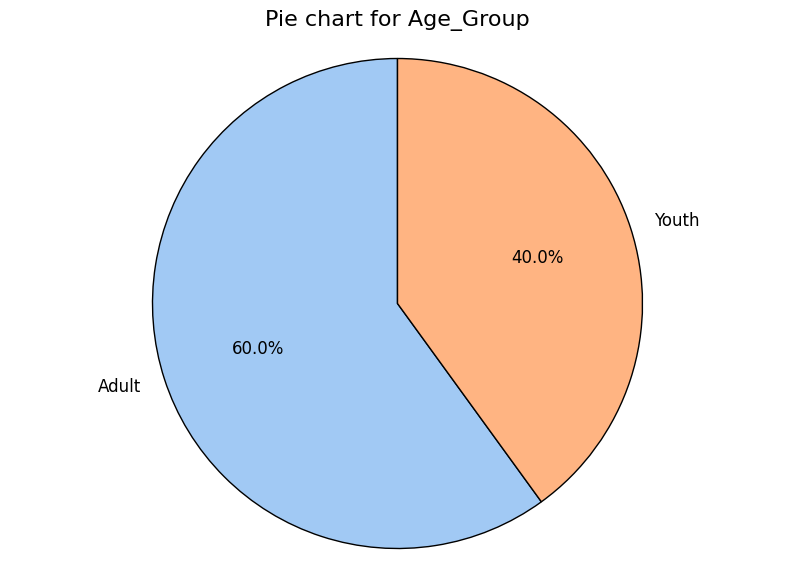

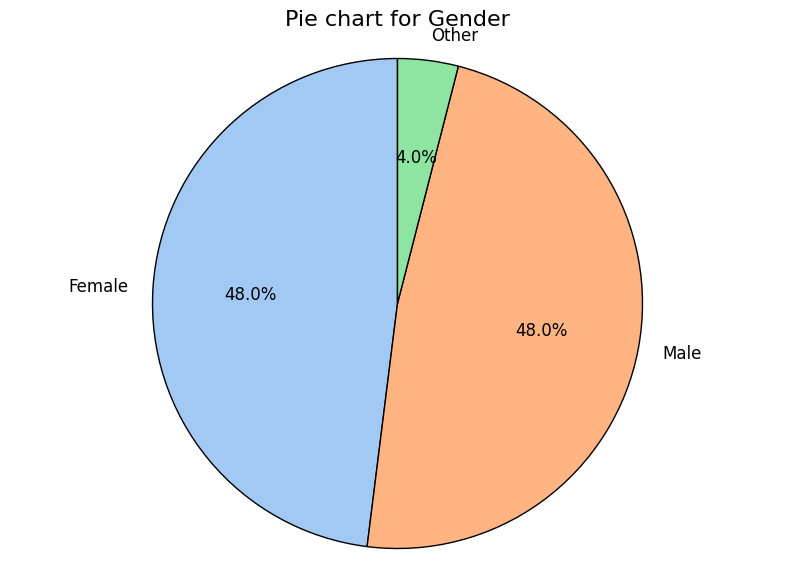

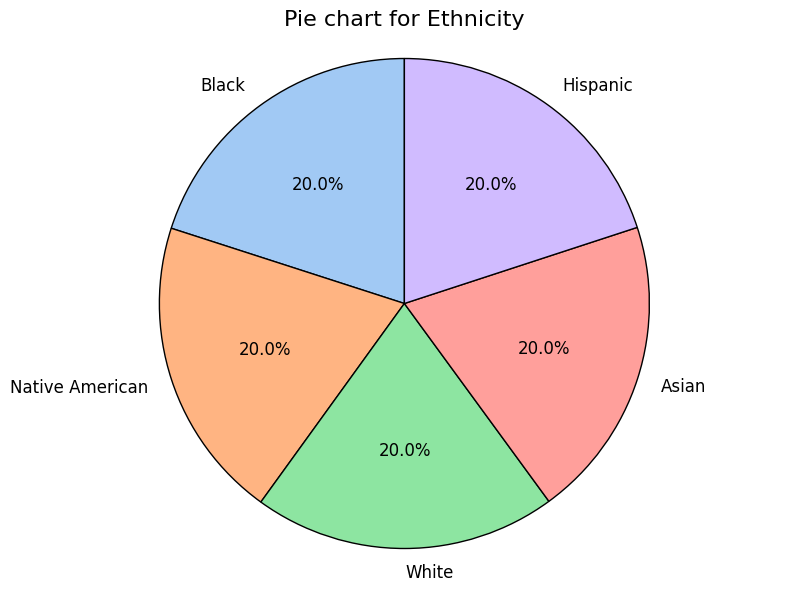

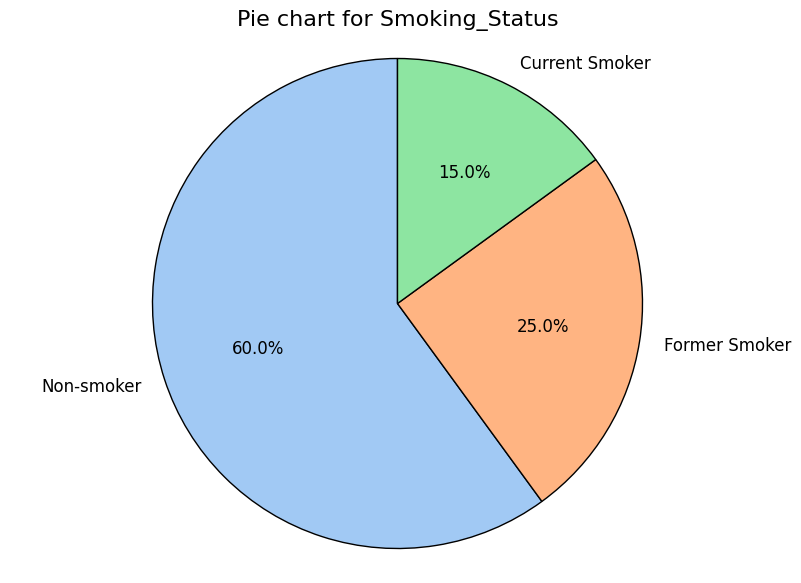

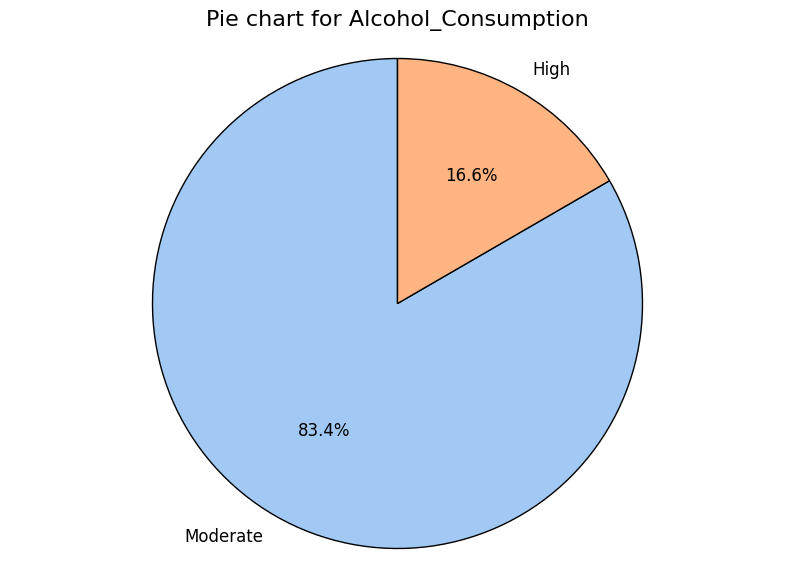

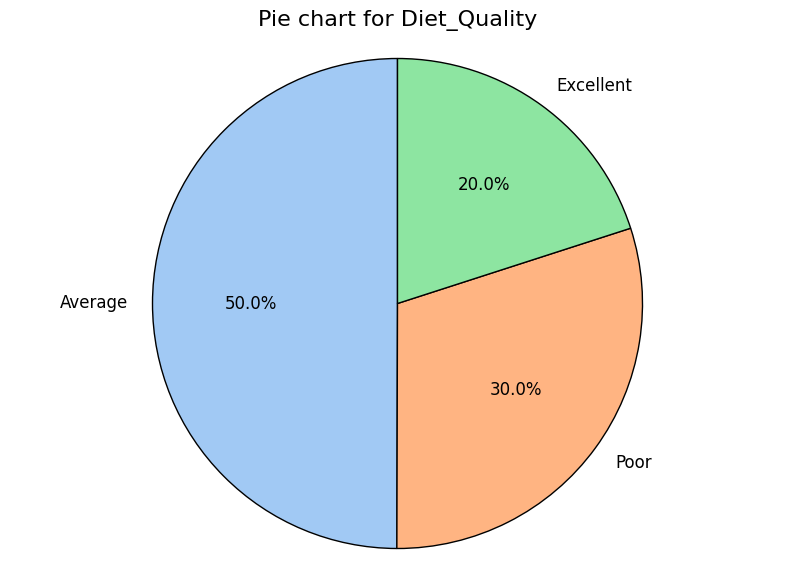

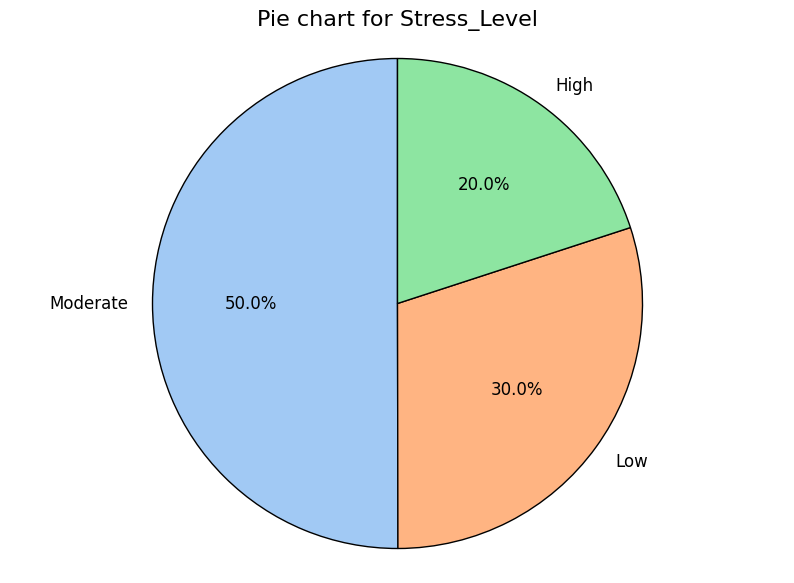

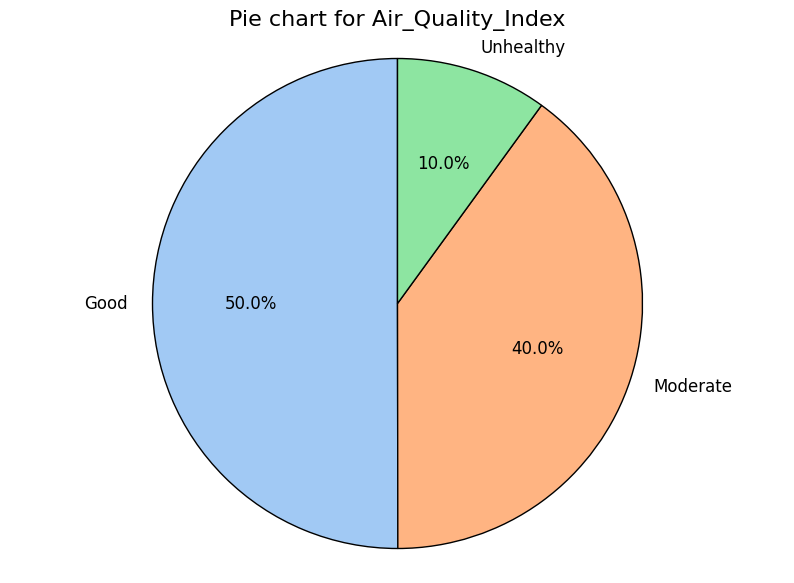

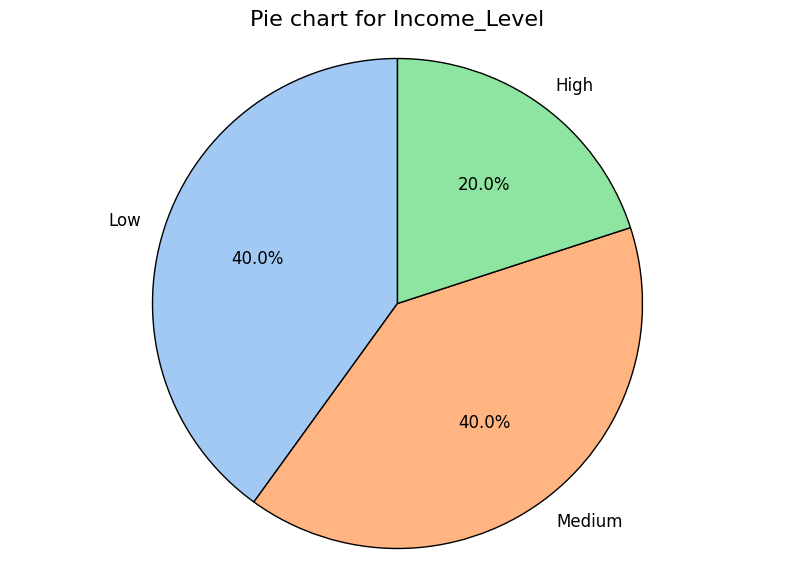

In [22]:
# Create a pie chart for each categorical column
for column in cols_categorical:
    plt.figure(figsize=(10, 7))
    colors = sns.color_palette('pastel')[0:len(data[column].unique())]
    data[column].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors, 
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 12}
    )
    plt.title(f'Pie chart for {column}', fontsize=16)
    plt.ylabel('')  # Hide the y-label
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()